In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Car_sale_ads.csv')

In [3]:
data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [5]:
data.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Index                      0
Price                      0
Currency                   0
Condition                  0
Vehicle_brand              0
Vehicle_model              0
Vehicle_version            0
Vehicle_generation         0
Production_year            0
Mileage_km                 0
Power_HP                   0
Displacement_cm3           0
Fuel_type                  0
CO2_emissions              0
Drive                      0
Transmission               0
Type                       0
Doors_number               0
Colour                     0
Origin_country             0
First_owner                0
First_registration_date    0
Offer_publication_date     0
Offer_location             0
Features                   0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,9107.0,110093.761283,59260.802032,1982.0,61943.0,113539.0,163976.5,208159.0
Price,9107.0,68413.612057,67935.719695,2300.0,29900.0,48900.0,79900.0,1360000.0
Production_year,9107.0,2014.667618,3.698423,1994.0,2012.0,2016.0,2017.0,2021.0
Mileage_km,9107.0,121740.909850,76474.499012,1.0,63717.5,117000.0,171000.0,1954026.0
Power_HP,9107.0,148.585813,66.152286,54.0,109.0,136.0,170.0,650.0
Displacement_cm3,9107.0,1789.741627,558.869226,875.0,1461.0,1598.0,1995.0,6592.0
CO2_emissions,9107.0,135.838476,32.543410,4.0,114.0,131.0,152.0,380.0
Doors_number,9107.0,4.769298,0.533554,2.0,5.0,5.0,5.0,5.0


In [9]:
data.head(2)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
1982,1982,17950,PLN,Used,Audi,A3,1.9 TDI DPF Attraction,8P (2003-2012),2010,147000.0,...,Manual,compact,3.0,gray,Belgium,Yes,14/07/2010,03/05/2021,"Ul.Tczewska 50 - 86-170 Nowe, świecki, Kujawsk...","['ABS', 'Electric front windows', 'Drivers air..."
2003,2003,47900,PLN,Used,Audi,A3,30 TDI Sportback,8V (2012-),2018,10000.0,...,Manual,compact,5.0,black,France,Yes,28/09/2018,02/05/2021,"Łęgowo 23/5 - 62-100 Wągrowiec, wągrowiecki, W...","['ABS', 'Electric front windows', 'Drivers air..."


In [10]:
data.Condition.unique()

array(['Used', 'New'], dtype=object)

In [11]:
data.drop(columns=['Index','Vehicle_generation','First_registration_date','Offer_publication_date','Offer_location','Features'], inplace=True)

In [12]:
data

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner
1982,17950,PLN,Used,Audi,A3,1.9 TDI DPF Attraction,2010,147000.0,105.0,1896.0,Diesel,124.0,Front wheels,Manual,compact,3.0,gray,Belgium,Yes
2003,47900,PLN,Used,Audi,A3,30 TDI Sportback,2018,10000.0,116.0,1598.0,Diesel,114.0,Front wheels,Manual,compact,5.0,black,France,Yes
2019,22990,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2007,256000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,city_cars,5.0,black,Germany,Yes
2072,35900,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2012,244000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,compact,5.0,black,Germany,Yes
2077,52900,PLN,Used,Audi,A3,2.0 TDI Ambition,2014,188000.0,150.0,1968.0,Diesel,108.0,Front wheels,Manual,compact,5.0,white,Germany,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208123,79777,PLN,Used,Volvo,S80,T5 Momentum,2015,151000.0,240.0,1999.0,Gasoline,184.0,Front wheels,Automatic,sedan,4.0,gray,Poland,Yes
208148,29900,PLN,Used,Volvo,S80,2.0D Summum,2010,229105.0,136.0,1997.0,Diesel,151.0,Front wheels,Manual,sedan,4.0,golden,Netherlands,Yes
208150,36800,PLN,Used,Volvo,V40,D2 Momentum,2013,180000.0,115.0,1560.0,Diesel,105.0,Front wheels,Automatic,compact,5.0,silver,Germany,Yes
208152,58000,PLN,Used,Volvo,V40,D3 Drive-E Kinetic,2016,63000.0,150.0,1969.0,Diesel,95.0,Front wheels,Manual,compact,5.0,other,Poland,Yes


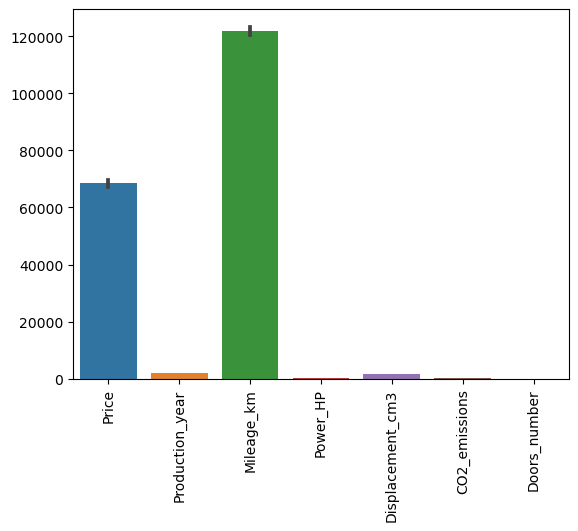

In [13]:
sns.barplot(data=data)
plt.xticks(rotation=90)

plt.show()


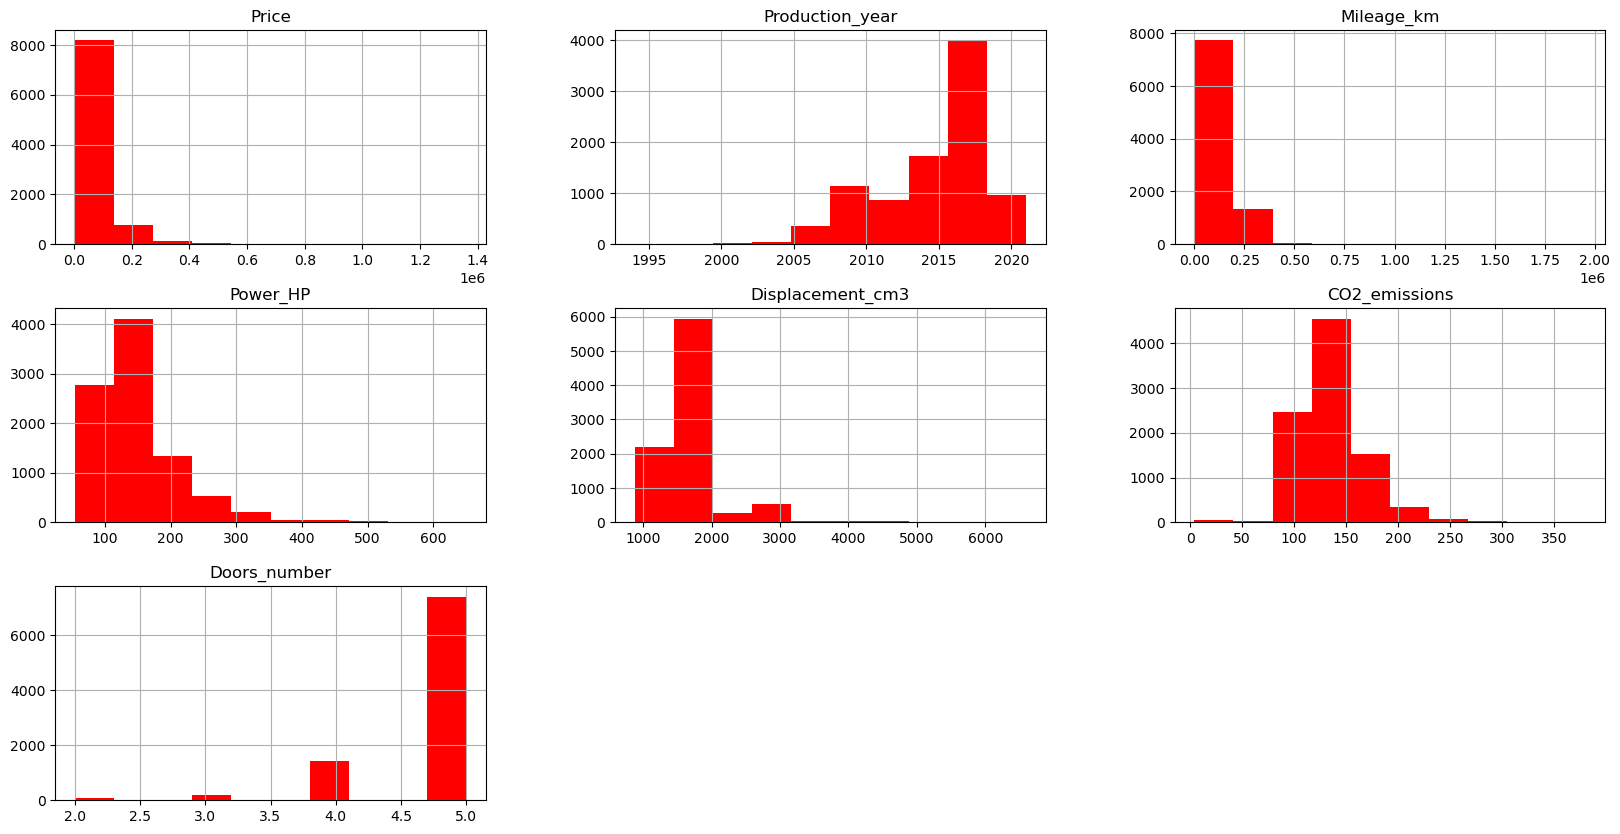

In [14]:
data.hist(figsize=(20,10),color='red');

In [15]:
data_co2=data.groupby(['Vehicle_brand'])['CO2_emissions'].sum()
data_co2

Vehicle_brand
Audi              97788.0
BMW              107038.0
Chrysler            788.0
Citroën           24593.0
Dacia              4378.0
Fiat              21781.0
Ford             108935.0
Honda             30529.0
Hyundai           37548.0
Jaguar             3306.0
Jeep               9778.0
Kia               49343.0
Lancia             1080.0
Land Rover         8745.0
Lexus              6924.0
Mazda             26857.0
Mercedes-Benz     79252.0
Mitsubishi        10261.0
Nissan            31988.0
Opel             119061.0
Peugeot           25783.0
Porsche            7398.0
Renault           58564.0
Saab                819.0
Seat              25298.0
Smart               683.0
Subaru             6867.0
Suzuki            14092.0
Toyota            72198.0
Volkswagen       114728.0
Volvo             32470.0
Škoda             98208.0
Name: CO2_emissions, dtype: float64

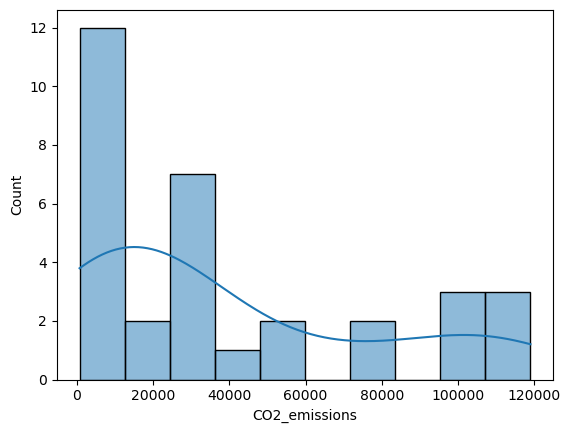

In [16]:
sns.histplot(data=data_co2, bins=10, kde=True)
plt.show()

In [17]:
data.head()

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner
1982,17950,PLN,Used,Audi,A3,1.9 TDI DPF Attraction,2010,147000.0,105.0,1896.0,Diesel,124.0,Front wheels,Manual,compact,3.0,gray,Belgium,Yes
2003,47900,PLN,Used,Audi,A3,30 TDI Sportback,2018,10000.0,116.0,1598.0,Diesel,114.0,Front wheels,Manual,compact,5.0,black,France,Yes
2019,22990,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2007,256000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,city_cars,5.0,black,Germany,Yes
2072,35900,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2012,244000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,compact,5.0,black,Germany,Yes
2077,52900,PLN,Used,Audi,A3,2.0 TDI Ambition,2014,188000.0,150.0,1968.0,Diesel,108.0,Front wheels,Manual,compact,5.0,white,Germany,Yes


In [18]:
data.columns

Index(['Price', 'Currency', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Vehicle_version', 'Production_year', 'Mileage_km', 'Power_HP',
       'Displacement_cm3', 'Fuel_type', 'CO2_emissions', 'Drive',
       'Transmission', 'Type', 'Doors_number', 'Colour', 'Origin_country',
       'First_owner'],
      dtype='object')

In [19]:
pln=data.query("Currency=='PLN'")

In [20]:
eur=data.query("Currency=='EUR'")

In [21]:
eur

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner
34803,9500,EUR,Used,BMW,X6,xDrive30d,2014,178000.0,258.0,2993.0,Diesel,183.0,4x4 (permanent),Automatic,SUV,5.0,black,Belgium,Yes
39167,7200,EUR,Used,Citroën,C4 Picasso,1.6 BlueHDi Shine S&S EAT6,2018,38000.0,120.0,1560.0,Diesel,100.0,Front wheels,Automatic,minivan,5.0,white,Belgium,Yes
88797,31900,EUR,Used,Land Rover,Range Rover,4.4SD V8 Vogue,2012,174000.0,340.0,4367.0,Diesel,229.0,4x4 (attached automatically),Automatic,SUV,5.0,black,Slovakia,Yes
97726,8600,EUR,Used,Mercedes-Benz,Klasa B,180 (CDI) d 7G-DCT,2016,122000.0,109.0,1461.0,Diesel,104.0,Front wheels,Automatic,compact,5.0,black,Belgium,Yes
131368,7200,EUR,Used,Opel,Zafira,Tourer 2.0 CDTI ecoFLEX Start/Stop,2017,91000.0,170.0,1956.0,Diesel,129.0,Front wheels,Manual,minivan,5.0,black,Belgium,Yes
143986,11500,EUR,Used,Renault,Espace,1.6 dCi Energy Magnetic EDC 7os,2018,62000.0,160.0,1598.0,Diesel,123.0,Front wheels,Automatic,minivan,5.0,black,Belgium,Yes
159126,20644,EUR,Used,Seat,Leon,2.0 TSI Cupra 290 Start/Stop DSG,2016,75000.0,290.0,1984.0,Gasoline,154.0,Front wheels,Automatic,station_wagon,5.0,gray,Poland,Yes
198922,6900,EUR,Used,Volkswagen,Tiguan,1.4 TSI BMT ACT Trendline,2016,84000.0,150.0,1395.0,Gasoline,130.0,Front wheels,Manual,SUV,5.0,black,Belgium,Yes


In [22]:
data.head()

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner
1982,17950,PLN,Used,Audi,A3,1.9 TDI DPF Attraction,2010,147000.0,105.0,1896.0,Diesel,124.0,Front wheels,Manual,compact,3.0,gray,Belgium,Yes
2003,47900,PLN,Used,Audi,A3,30 TDI Sportback,2018,10000.0,116.0,1598.0,Diesel,114.0,Front wheels,Manual,compact,5.0,black,France,Yes
2019,22990,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2007,256000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,city_cars,5.0,black,Germany,Yes
2072,35900,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2012,244000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,compact,5.0,black,Germany,Yes
2077,52900,PLN,Used,Audi,A3,2.0 TDI Ambition,2014,188000.0,150.0,1968.0,Diesel,108.0,Front wheels,Manual,compact,5.0,white,Germany,Yes


In [23]:
Condition_used=data.query("Condition=='Used'")

In [24]:
Condition_used

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner
1982,17950,PLN,Used,Audi,A3,1.9 TDI DPF Attraction,2010,147000.0,105.0,1896.0,Diesel,124.0,Front wheels,Manual,compact,3.0,gray,Belgium,Yes
2003,47900,PLN,Used,Audi,A3,30 TDI Sportback,2018,10000.0,116.0,1598.0,Diesel,114.0,Front wheels,Manual,compact,5.0,black,France,Yes
2019,22990,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2007,256000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,city_cars,5.0,black,Germany,Yes
2072,35900,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2012,244000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,compact,5.0,black,Germany,Yes
2077,52900,PLN,Used,Audi,A3,2.0 TDI Ambition,2014,188000.0,150.0,1968.0,Diesel,108.0,Front wheels,Manual,compact,5.0,white,Germany,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208123,79777,PLN,Used,Volvo,S80,T5 Momentum,2015,151000.0,240.0,1999.0,Gasoline,184.0,Front wheels,Automatic,sedan,4.0,gray,Poland,Yes
208148,29900,PLN,Used,Volvo,S80,2.0D Summum,2010,229105.0,136.0,1997.0,Diesel,151.0,Front wheels,Manual,sedan,4.0,golden,Netherlands,Yes
208150,36800,PLN,Used,Volvo,V40,D2 Momentum,2013,180000.0,115.0,1560.0,Diesel,105.0,Front wheels,Automatic,compact,5.0,silver,Germany,Yes
208152,58000,PLN,Used,Volvo,V40,D3 Drive-E Kinetic,2016,63000.0,150.0,1969.0,Diesel,95.0,Front wheels,Manual,compact,5.0,other,Poland,Yes


In [25]:
Condition_new=data.query("Condition=='New'")

In [26]:
Condition_new

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner
5940,159900,PLN,New,Audi,A4,35 TFSI mHEV S tronic,2021,10.0,150.0,1984.0,Gasoline,130.0,Front wheels,Automatic,sedan,4.0,white,Poland,Yes
8819,176000,PLN,New,Audi,A4,40 TDI S tronic,2020,2600.0,190.0,1968.0,Diesel,110.0,Front wheels,Automatic,station_wagon,5.0,red,Poland,Yes
28736,269900,PLN,New,BMW,Seria 5,530e xDrive,2021,4000.0,184.0,1998.0,Hybrid,46.0,4x4 (permanent),Automatic,sedan,4.0,gray,Poland,Yes
31925,155900,PLN,New,BMW,X1,sDrive18d Sport Line,2020,5000.0,150.0,1995.0,Diesel,120.0,Front wheels,Automatic,SUV,5.0,gray,Poland,Yes
70716,105000,PLN,New,Honda,Jazz,1.5 i-MMD Executive Crosstar (Czarny Dach),2020,24.0,98.0,1498.0,Hybrid,82.0,Front wheels,Automatic,city_cars,5.0,white,Poland,Yes
81764,259900,PLN,New,Jeep,Wrangler,Unlimited GME 2.0 Turbo Rubicon,2021,2000.0,270.0,1995.0,Gasoline,213.0,4x4 (attached manually),Automatic,SUV,5.0,white,Poland,Yes
94214,135305,PLN,New,Mazda,3,2.0 mHEV AWD Hikari,2020,650.0,180.0,1998.0,Gasoline,137.0,4x4 (attached automatically),Manual,compact,5.0,black,Poland,Yes
103142,350000,PLN,New,Mercedes-Benz,GLE,Coupe 400 d 4-Matic Premium,2021,330.0,330.0,2925.0,Diesel,183.0,4x4 (permanent),Automatic,SUV,5.0,black,Poland,Yes
103860,289900,PLN,New,Mercedes-Benz,Klasa A,AMG 45 S 4Matic+ AMG Speedshift DCT 8G,2021,3200.0,421.0,1991.0,Gasoline,189.0,4x4 (permanent),Automatic,compact,5.0,white,Poland,Yes
104137,330000,PLN,New,Mercedes-Benz,GLE,Coupe 400 d 4-Matic Advanced,2021,290.0,330.0,2925.0,Diesel,183.0,4x4 (permanent),Automatic,SUV,5.0,white,Poland,Yes


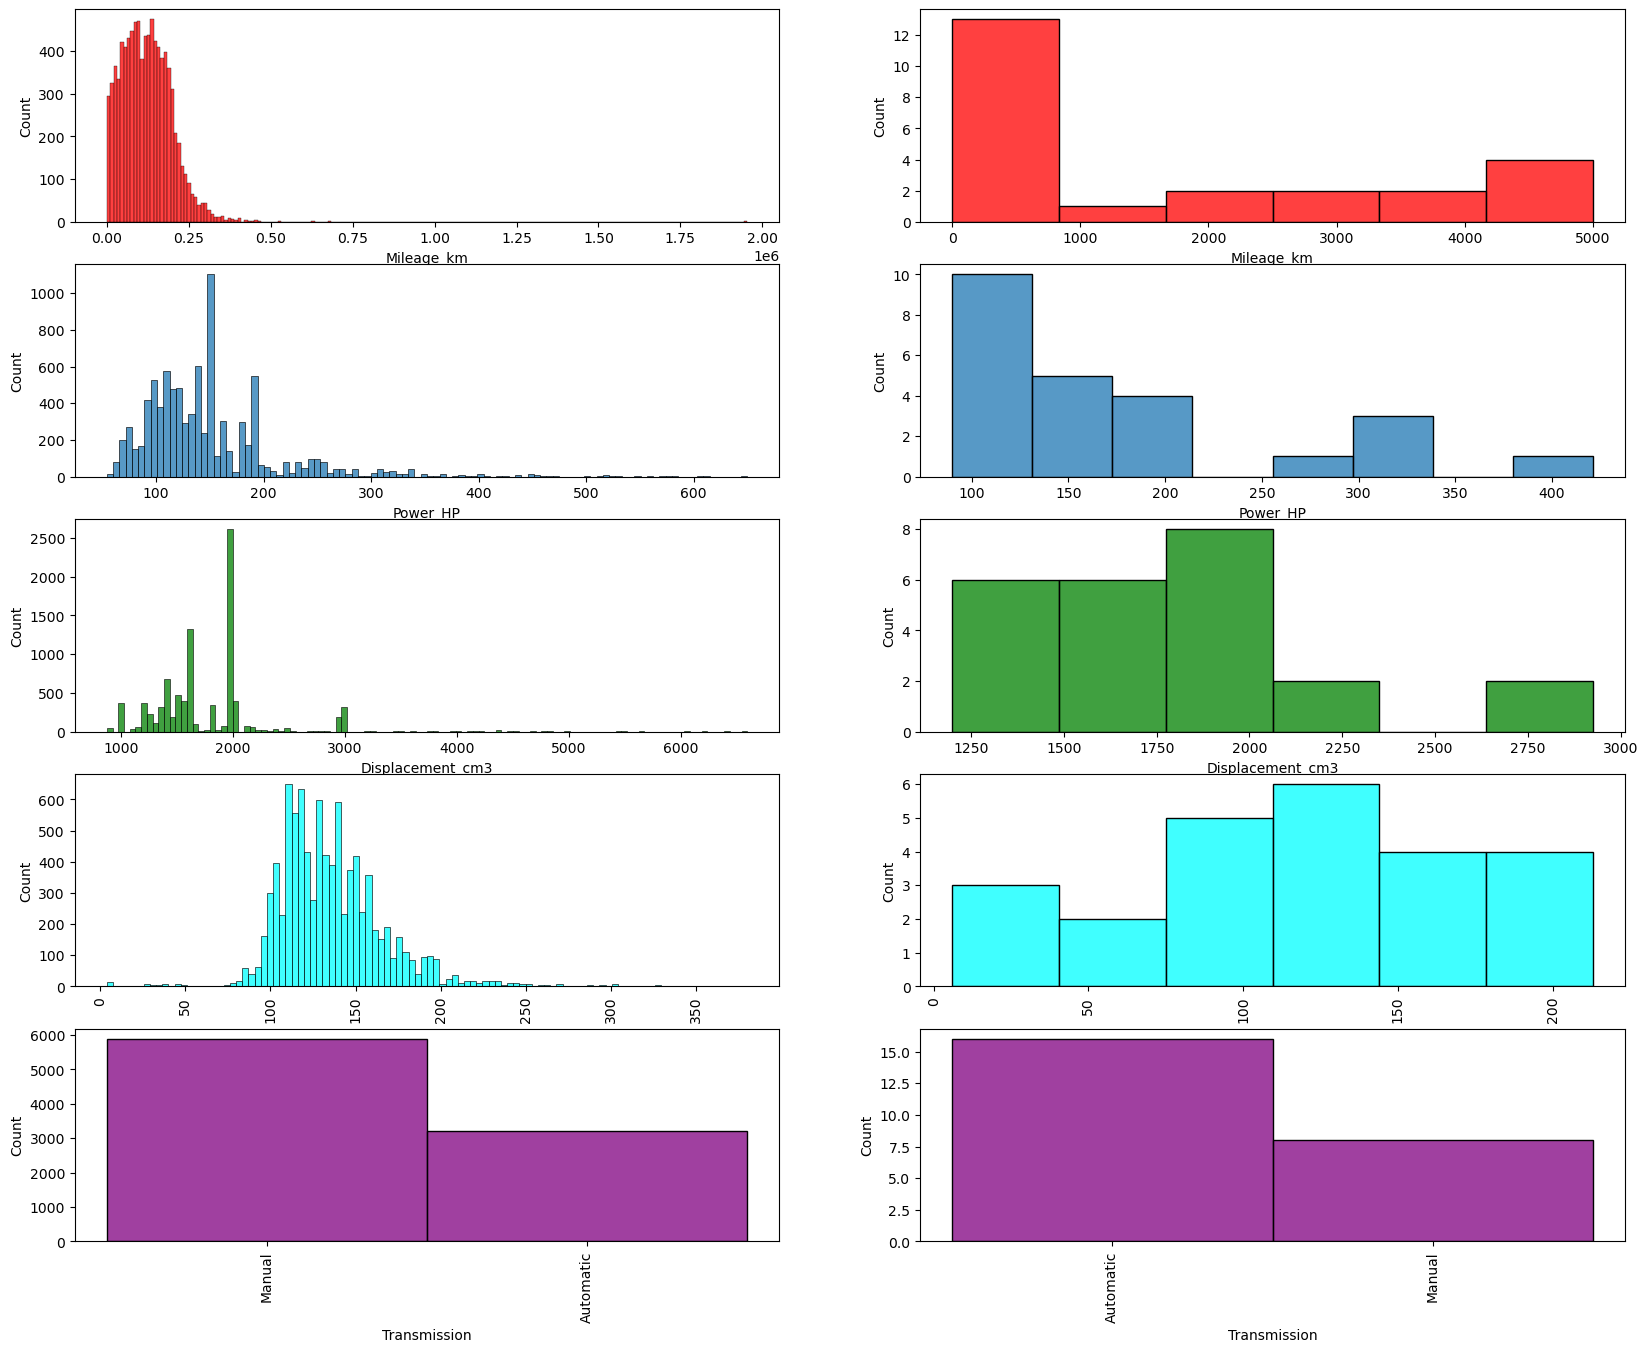

In [27]:
plt.figure(figsize=(20,16))
plt.subplot(5,2,1)
sns.histplot(data=Condition_used,x='Mileage_km',color='red')

plt.subplot(5,2,2)
sns.histplot(data=Condition_new,x='Mileage_km',color='red')


plt.subplot(5,2,3)
sns.histplot(data=Condition_used,x='Power_HP')

plt.subplot(5,2,4)
sns.histplot(data=Condition_new,x='Power_HP')

plt.subplot(5,2,5)
sns.histplot(data=Condition_used,x='Displacement_cm3',color='green')

plt.subplot(5,2,6)
sns.histplot(data=Condition_new,x='Displacement_cm3',color='green')

plt.subplot(5,2,7)
sns.histplot(data=Condition_used,x='CO2_emissions',color='cyan')
plt.xticks(rotation=90)


plt.subplot(5,2,8)
sns.histplot(data=Condition_new,x='CO2_emissions',color='cyan')
plt.xticks(rotation=90)

plt.subplot(5,2,9)
sns.histplot(data=Condition_used,x='Transmission',color='purple')
plt.xticks(rotation=90)


plt.subplot(5,2,10)
sns.histplot(data=Condition_new,x='Transmission',color='purple')
plt.xticks(rotation=90)

plt.show()

<Axes: ylabel='Count'>

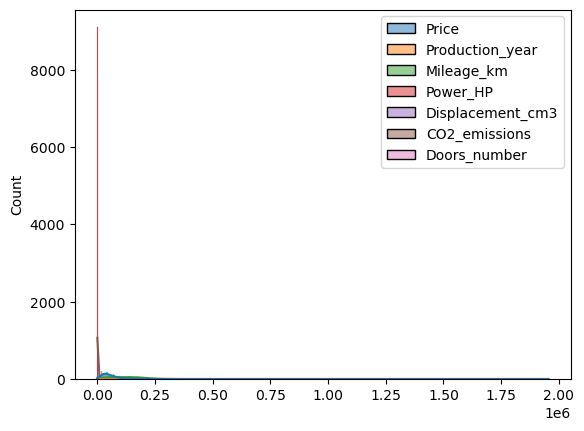

In [28]:
sns.histplot(data=pln,kde=True)

In [29]:
data.Fuel_type.unique()

array(['Diesel', 'Gasoline', 'Hybrid', 'Gasoline + LPG', 'Gasoline + CNG'],
      dtype=object)

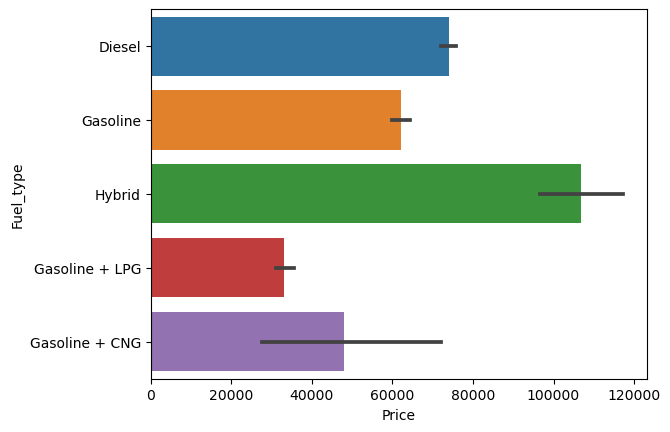

In [30]:
sns.barplot(data=data,x='Price',y='Fuel_type')
plt.show()

In [31]:
data.head()

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner
1982,17950,PLN,Used,Audi,A3,1.9 TDI DPF Attraction,2010,147000.0,105.0,1896.0,Diesel,124.0,Front wheels,Manual,compact,3.0,gray,Belgium,Yes
2003,47900,PLN,Used,Audi,A3,30 TDI Sportback,2018,10000.0,116.0,1598.0,Diesel,114.0,Front wheels,Manual,compact,5.0,black,France,Yes
2019,22990,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2007,256000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,city_cars,5.0,black,Germany,Yes
2072,35900,PLN,Used,Audi,A3,2.0 TDI Sportback DPF,2012,244000.0,140.0,1968.0,Diesel,115.0,Front wheels,Manual,compact,5.0,black,Germany,Yes
2077,52900,PLN,Used,Audi,A3,2.0 TDI Ambition,2014,188000.0,150.0,1968.0,Diesel,108.0,Front wheels,Manual,compact,5.0,white,Germany,Yes


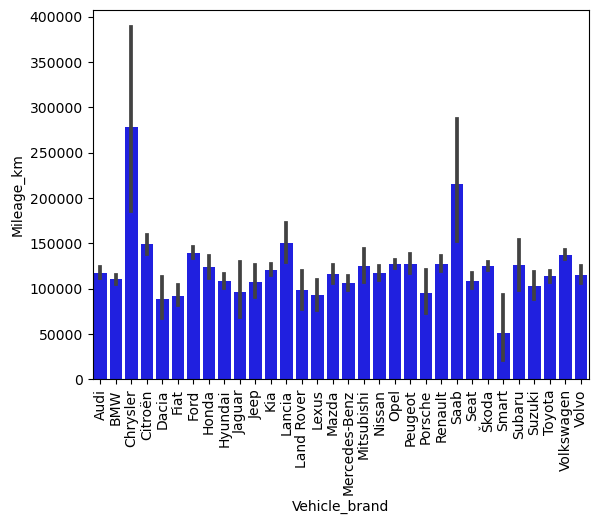

In [32]:
sns.barplot(x='Vehicle_brand', y='Mileage_km', data=data, color='blue', label='Mileage_km')
plt.xticks(rotation=90)
plt.show()

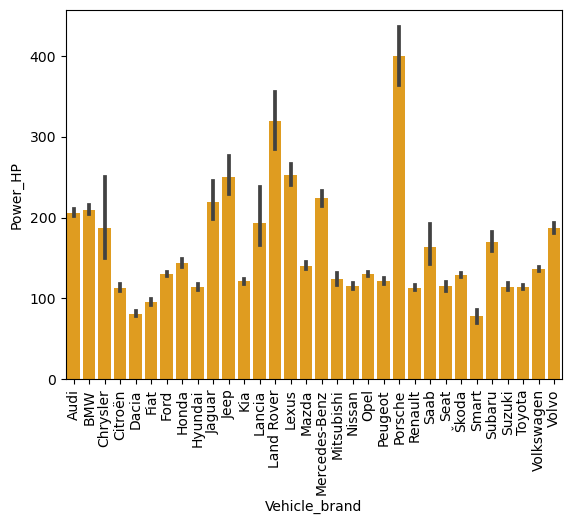

In [33]:
sns.barplot(x='Vehicle_brand', y='Power_HP', data=data, color='orange', label='Power_HP')
plt.xticks(rotation=90)
plt.show()

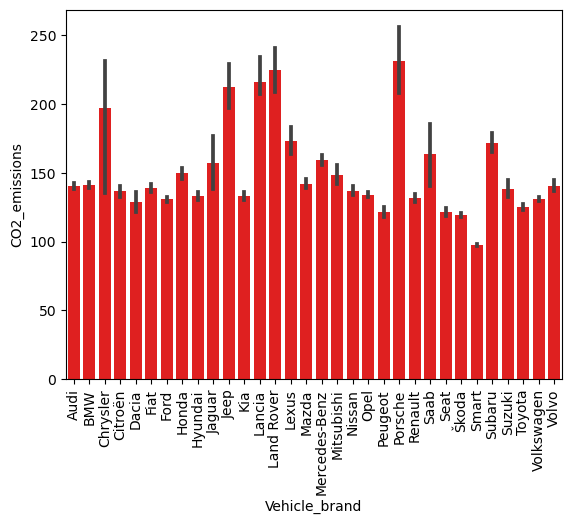

In [34]:
sns.barplot(x='Vehicle_brand', y='CO2_emissions', data=data, color='red', label='CO2_emissions')
plt.xticks(rotation=90)
plt.show()

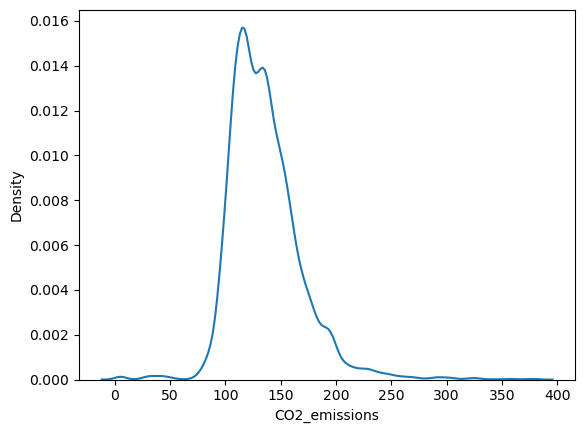

In [35]:
sns.kdeplot(data=Condition_used,x='CO2_emissions')
plt.show()

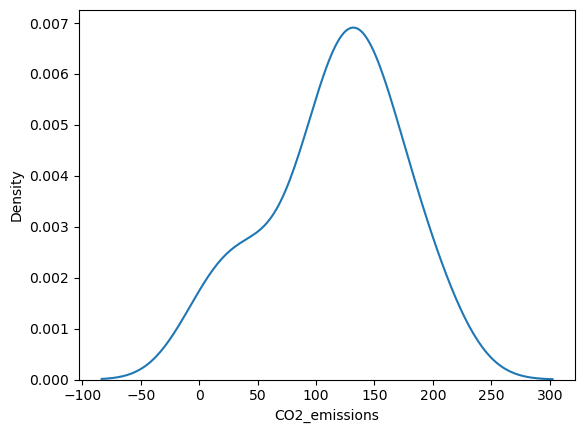

In [36]:
sns.kdeplot(data=Condition_new,x='CO2_emissions')
plt.show()

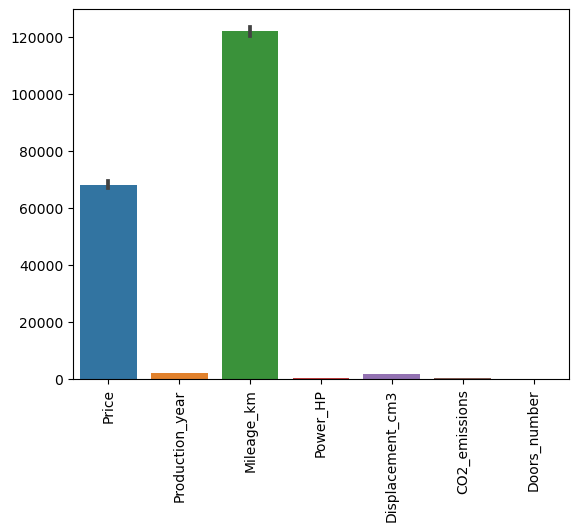

In [37]:
sns.barplot(data=Condition_used)
plt.xticks(rotation=90)

plt.show()


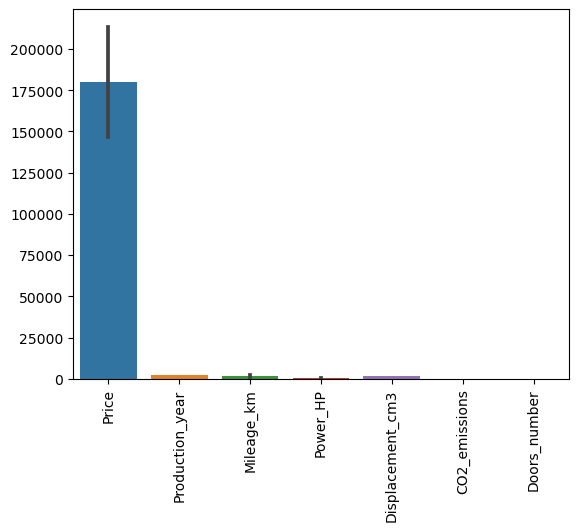

In [38]:
sns.barplot(data=Condition_new)
plt.xticks(rotation=90)

plt.show()
